Imports

In [4]:
%pip install opendatasets
%pip install pandas
%pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata




[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Check if data exists, if not, download

In [1]:
import opendatasets as od 
import pandas as pd
import os

if not os.path.exists('steam-games-dataset'):
    od.download( 
        "https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data") 
    
if not os.path.exists('steam-video-games'):
    od.download( 
        "https://www.kaggle.com/datasets/tamber/steam-video-games/data") 
    
if not os.path.exists('popularity-of-games-on-steam'):
    od.download( 
        "https://www.kaggle.com/datasets/michau96/popularity-of-games-on-steam") 


Load Data

In [2]:
game_popularity = pd.read_csv('popularity-of-games-on-steam\SteamCharts.csv', encoding='ISO-8859-1')
steam_games = pd.read_csv('steam-games-dataset\games.csv', encoding='ISO-8859-1')
user_data = pd.read_csv('steam-video-games\steam-200k.csv', encoding='ISO-8859-1', usecols=[0, 1, 2, 3], names=['UserID', 'Game Title', 'Behavior', 'Quantity'])
# Note: Behvior is either purchase or play. When behavior is purchase, quantity is always 1. When behavior is play, quantity is the number of hours

Initial Data Exploration

In [5]:
import missingno as msno

In [11]:
print(game_popularity.isna().sum())
print(len(game_popularity))

gamename            0
year                0
month               0
avg                 0
gain             1260
peak                0
avg_peak_perc       0
dtype: int64
83789


<AxesSubplot:>

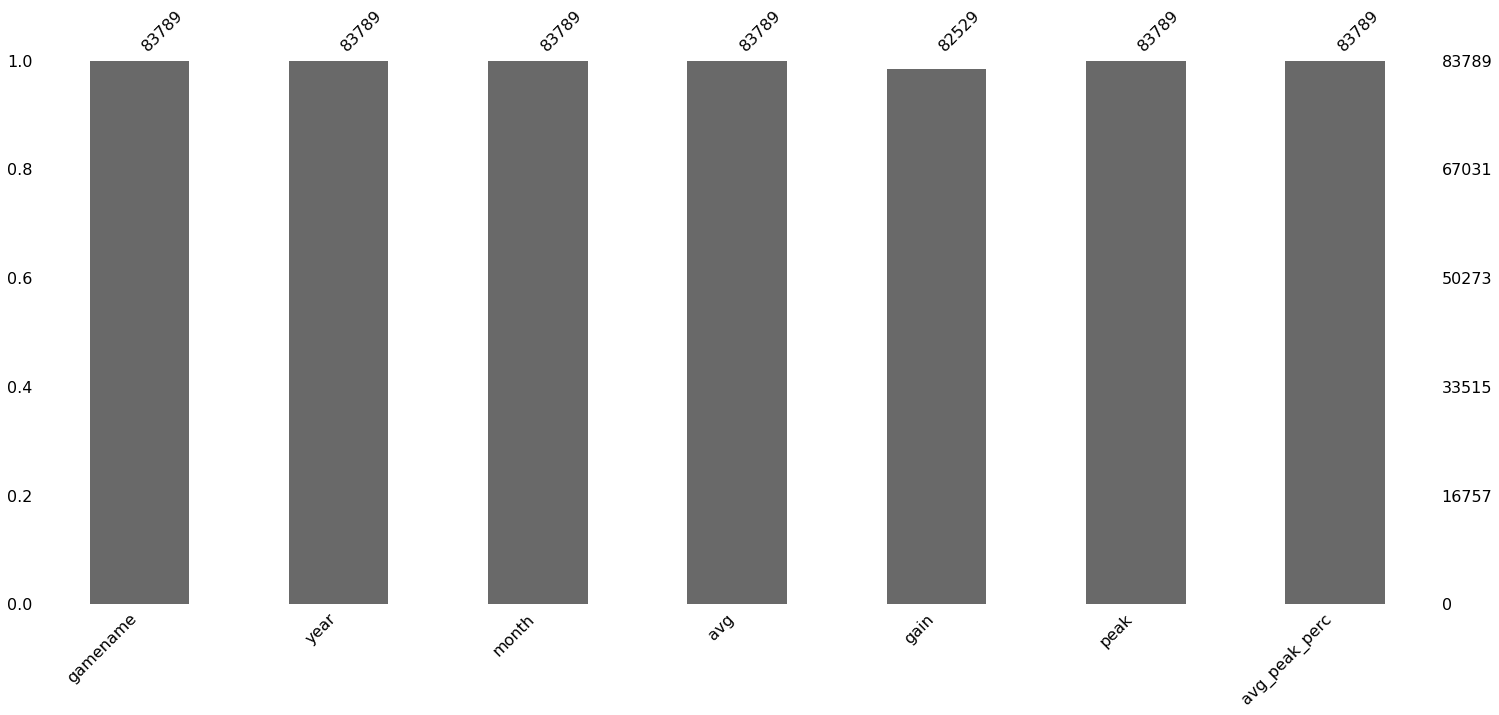

In [6]:
msno.bar(game_popularity)

In [14]:
print(steam_games.isna().sum())
print(len(steam_games))

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Header image                      0
Website                       45651
Support url                   43511
Support email                 13593
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                       

<AxesSubplot:>

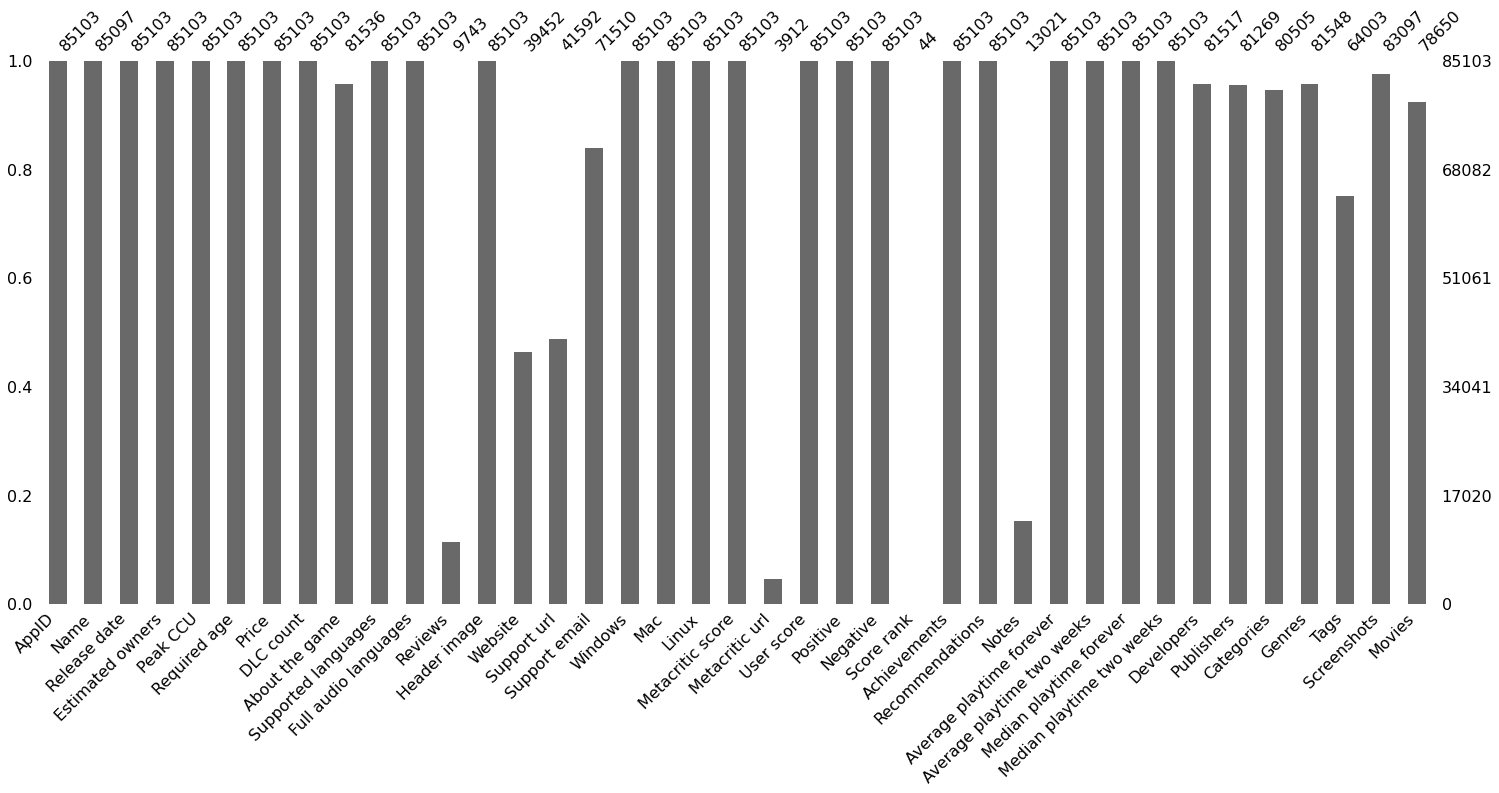

In [7]:
msno.bar(steam_games)

In [19]:
print(user_data.isna().sum())
print(len(user_data))

UserID        0
Game Title    0
Behavior      0
Quantity      0
dtype: int64
200000


,UserID,Game Title,Behavior,Quantity
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


<AxesSubplot:>

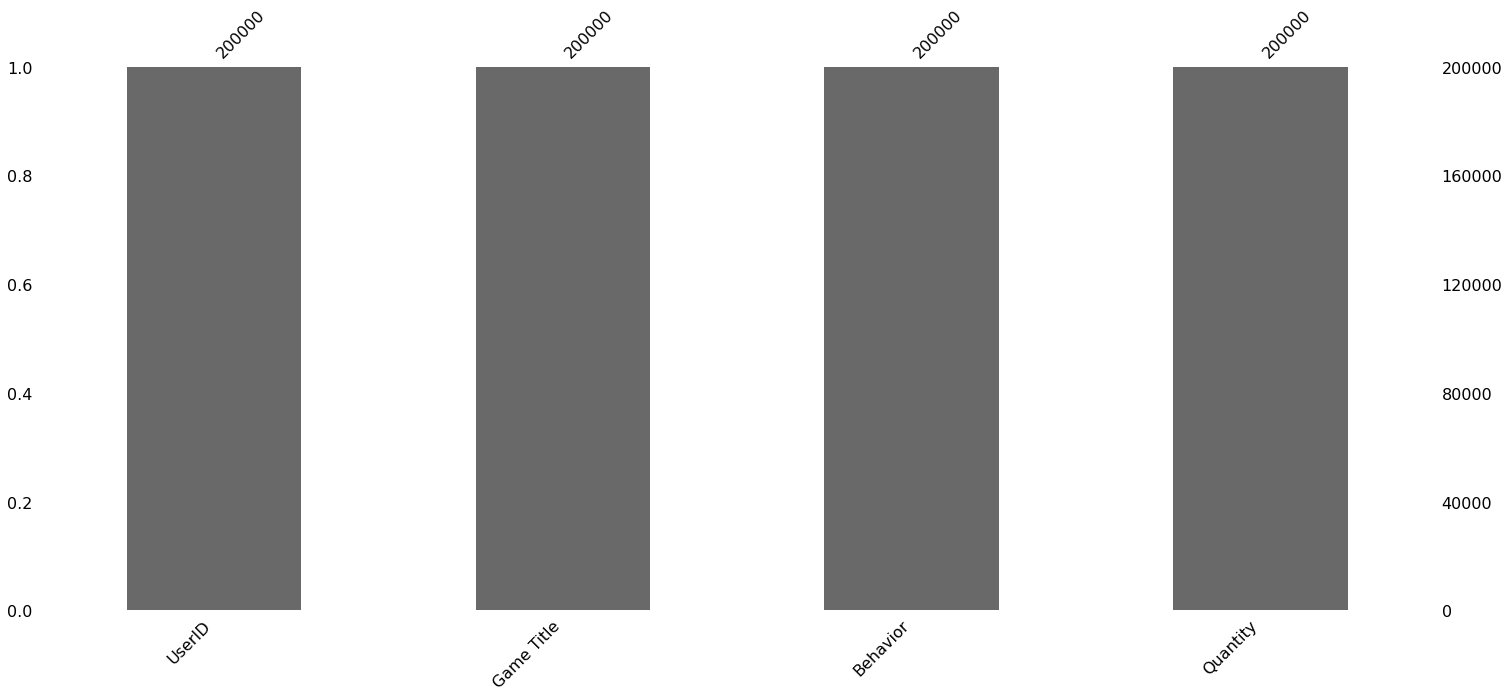

In [8]:
msno.bar(user_data)